In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/items.csv')
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv('items.csv')

In [6]:
df.head()

BillNo                             Itemname  Quantity          Date  Price  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/10 8:26   2.55   
1  536365                  WHITE METAL LANTERN         6  12/1/10 8:26   3.39   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  12/1/10 8:26   2.75   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/10 8:26   3.39   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/10 8:26   3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom

In [7]:
df.shape

(522064, 7)

In [8]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [9]:
df = df.dropna()
df.shape

(388023, 7)

## Market Basket Analysis

In [10]:
# Prepare dataset.
item_mat = df.pivot_table(index='BillNo', columns='Itemname', values='Quantity',aggfunc='sum').fillna(0)
item_mat.head()

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536365                       0.0                         0.0   
536366                       0.0                         0.0   
536367                       0.0                         0.0   
536368                       0.0                         0.0   
536369                       0.0                         0.0   

Itemname  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
BillNo                                                           
536365                          0.0                        0.0   
536366                          0.0                        0.0   
536367                          0.0                        0.0   
536368                          0.0                        0.0   
536369                          0.0                        0.0   

Itemname  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
BillNo                                                                     
536365                             0.0                               0.0   
536366                             0.0                               0.0   
536367                             0.0                               0.0   
536368                             0.0                               0.0   
536369                             0.0                               0.0   

Itemname  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
BillNo                                                                     
536365                                0.0                            0.0   
536366                                0.0                            0.0   
536367                                0.0                            0.0   
536368                                0.0                            0.0   
536369                                0.0                            0.0   

Itemname  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
BillNo                                                                       
536365                                    0.0                          0.0   
536366                                    0.0                          0.0   
536367                                    0.0                          0.0   
536368                                    0.0                          0.0   
536369                                    0.0                          0.0   

Itemname  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
BillNo                                                                    
536365                          0.0                                 0.0   
536366                          0.0                                 0.0   
536367                          0.0                                 0.0   
536368                          0.0                                 0.0   
536369                          0.0                                 0.0   

Itemname  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
BillNo                                                                 
536365                            0.0                            0.0   
536366                            0.0                            0.0   
536367                            0.0                            0.0   
536368                            0.0                            0.0   
536369                            0.0                            0.0   

Itemname  12 PINK HEN+CHICKS IN BASKET  12 PINK ROSE PEG PLACE SETTINGS  \
BillNo                                                                    
536365                             0.0                              0.0   
536366                             0.0                              0.0   
536367                             0.0                              0.0   
536368                             0.0                              0

In [11]:
item_mat.shape

(18165, 3846)

In [12]:
# Drop duplicates.
item_df = item_mat.drop_duplicates()
item_df.shape

(17764, 3846)

In [13]:
# Encode the datasets.
enc_df = item_df.applymap(lambda x: True if x > 0 else False)

In [14]:
enc_df.head()

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536365                     False                       False   
536366                     False                       False   
536367                     False                       False   
536368                     False                       False   
536369                     False                       False   

Itemname  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
BillNo                                                           
536365                        False                      False   
536366                        False                      False   
536367                        False                      False   
536368                        False                      False   
536369                        False                      False   

Itemname  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
BillNo                                                                     
536365                           False                             False   
536366                           False                             False   
536367                           False                             False   
536368                           False                             False   
536369                           False                             False   

Itemname  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
BillNo                                                                     
536365                              False                          False   
536366                              False                          False   
536367                              False                          False   
536368                              False                          False   
536369                              False                          False   

Itemname  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
BillNo                                                                       
536365                                  False                        False   
536366                                  False                        False   
536367                                  False                        False   
536368                                  False                        False   
536369                                  False                        False   

Itemname  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
BillNo                                                                    
536365                        False                               False   
536366                        False                               False   
536367                        False                               False   
536368                        False                               False   
536369                        False                               False   

Itemname  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
BillNo                                                                 
536365                          False                          False   
536366                          False                          False   
536367                          False                          False   
536368                          False                          False   
536369                          False                          False   

Itemname  12 PINK HEN+CHICKS IN BASKET  12 PINK ROSE PEG PLACE SETTINGS  \
BillNo                                                                    
536365                           False                            False   
536366                           False                            False   
536367                           False                            False   
536368                           False                            Fal

### Apriori for Scatterplot Evaluation

In [15]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent = apriori(enc_df, min_support=0.0075, max_len=2, use_colnames=True)

rules = association_rules(frequent, metric='support', min_threshold=0)

In [16]:
rules.head()

antecedents                           consequents  \
0        (SCANDINAVIAN REDS RIBBONS)              (6 RIBBONS RUSTIC CHARM)   
1           (6 RIBBONS RUSTIC CHARM)           (SCANDINAVIAN REDS RIBBONS)   
2  (60 CAKE CASES DOLLY GIRL DESIGN)         (60 TEATIME FAIRY CAKE CASES)   
3      (60 TEATIME FAIRY CAKE CASES)     (60 CAKE CASES DOLLY GIRL DESIGN)   
4  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 60 PINK PAISLEY CAKE CASES)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.018408            0.039968  0.007994    0.434251  10.864832   
1            0.039968            0.018408  0.007994    0.200000  10.864832   
2            0.018915            0.035409  0.008444    0.446429  12.607881   
3            0.035409            0.018915  0.008444    0.238474  12.607881   
4            0.018915            0.036366  0.008500    0.449405  12.357935   

   leverage  conviction  
0  0.007258    1.696921  
1  0.007258    1.226990  
2  0.007774    1.742488  
3  0.007774    1.288315  
4  0.007812    1.750168

#### Support Metric
##### * Measures the share of transactions that contain an itemset.
##### * Less than 0.05 is low.

#### Confidence Metric
##### * The probability of purchase y, given that have purchased x.

#### Lift Metric
##### * >= 1 means there are confidence that relationship is not random.

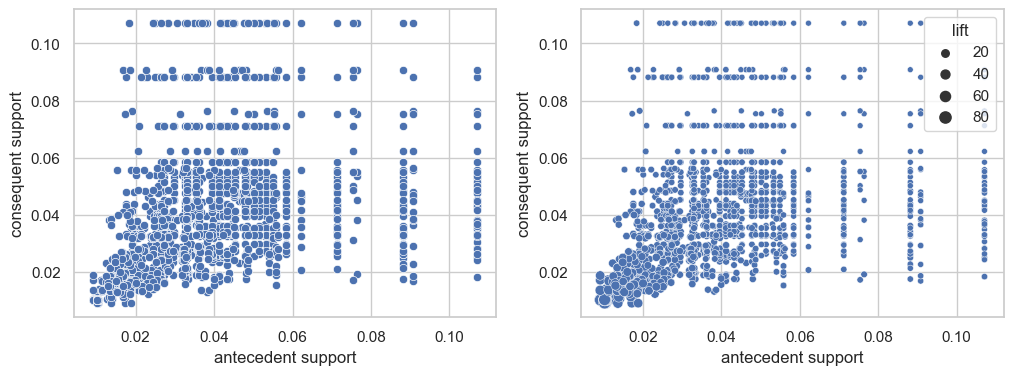

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(x='antecedent support', y='consequent support', data=rules, ax=ax1)
sns.scatterplot(x='antecedent support', y='consequent support', size='lift', data=rules, ax=ax2)
plt.show()

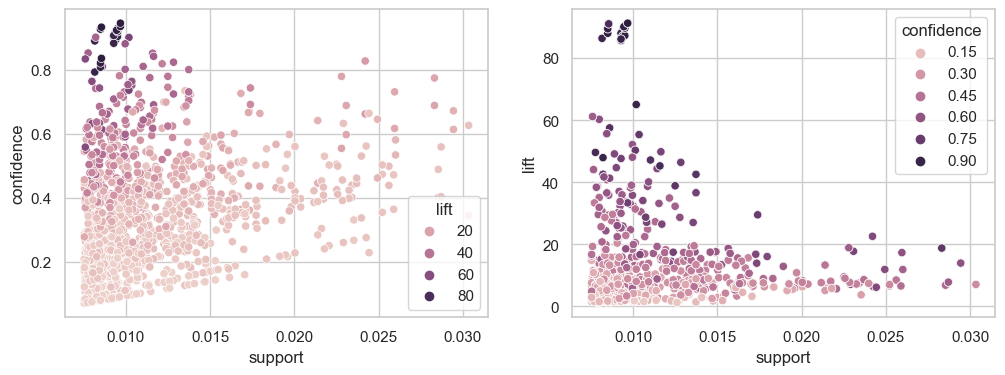

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(x='support', y='confidence', hue='lift', data=rules, ax=ax1)
sns.scatterplot(x='support', y='lift', hue='confidence', data=rules, ax=ax2)
plt.show()

### Apriori

In [19]:
frequent = apriori(enc_df, min_support=0.005, max_len=2, use_colnames=True)
frequent.head()

support                            itemsets
0  0.013342            (10 COLOUR SPACEBOY PEN)
1  0.007656        (12 COLOURED PARTY BALLOONS)
2  0.005010  (12 IVORY ROSE PEG PLACE SETTINGS)
3  0.010358   (12 MESSAGE CARDS WITH ENVELOPES)
4  0.015424     (12 PENCIL SMALL TUBE WOODLAND)

In [20]:
rules = association_rules(frequent, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False).head()

antecedents                   consequents  \
809       (DOLLY GIRL CHILDRENS CUP)   (DOLLY GIRL CHILDRENS BOWL)   
808      (DOLLY GIRL CHILDRENS BOWL)    (DOLLY GIRL CHILDRENS CUP)   
806              (DOLLY GIRL BEAKER)             (SPACEBOY BEAKER)   
807                (SPACEBOY BEAKER)           (DOLLY GIRL BEAKER)   
2869  (PACK OF 6 SKULL PAPER PLATES)  (PACK OF 6 SKULL PAPER CUPS)   

      antecedent support  consequent support   support  confidence  \
809             0.007769            0.007656  0.006305    0.811594   
808             0.007656            0.007769  0.006305    0.823529   
806             0.007262            0.007656  0.005517    0.759690   
807             0.007656            0.007262  0.005517    0.720588   
2869            0.008106            0.008106  0.006305    0.777778   

            lift  leverage  conviction  
809   106.008525  0.006245    5.267057  
808   106.008525  0.006245    5.622645  
806    99.228910  0.005461    4.129432  
807    99.228910  0.005461    3.552957  
2869   95.947531  0.006239    4.463522

In [21]:
rules.sort_values('support', ascending=False).head()

antecedents                   consequents  \
1788     (JUMBO BAG PINK POLKADOT)     (JUMBO BAG RED RETROSPOT)   
1789     (JUMBO BAG RED RETROSPOT)     (JUMBO BAG PINK POLKADOT)   
170   (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
171     (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
2543     (LUNCH BAG PINK POLKADOT)     (LUNCH BAG RED RETROSPOT)   

      antecedent support  consequent support   support  confidence       lift  \
1788            0.048469            0.088156  0.030342    0.626016   7.101247   
1789            0.088156            0.048469  0.030342    0.344189   7.101247   
170             0.043853            0.048018  0.029442    0.671374  13.981571   
171             0.048018            0.043853  0.029442    0.613130  13.981571   
2543            0.051396            0.071211  0.028710    0.558598   7.844218   

      leverage  conviction  
1788  0.026069    2.438192  
1789  0.026069    1.450923  
170   0.027336    2.896850  
171   0.027336    2.471496  
2543  0.025050    2.104179

In [22]:
frequent = apriori(enc_df, min_support=0.01, max_len=2, use_colnames=True)
frequent.sort_values('support', ascending=False).head()

support                              itemsets
600  0.107070  (WHITE HANGING HEART T-LIGHT HOLDER)
422  0.090802            (REGENCY CAKESTAND 3 TIER)
251  0.088156             (JUMBO BAG RED RETROSPOT)
37   0.076390       (ASSORTED COLOUR BIRD ORNAMENT)
344  0.075377                       (PARTY BUNTING)

In [23]:
rules = association_rules(frequent, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False).head()

antecedents  \
560              (REGENCY TEA PLATE GREEN)   
561               (REGENCY TEA PLATE PINK)   
559             (REGENCY SUGAR BOWL GREEN)   
558                (REGENCY MILK JUG PINK)   
592  (SET OF 3 WOODEN STOCKING DECORATION)   

                            consequents  antecedent support  \
560            (REGENCY TEA PLATE PINK)            0.013848   
561           (REGENCY TEA PLATE GREEN)            0.011315   
559             (REGENCY MILK JUG PINK)            0.013567   
558          (REGENCY SUGAR BOWL GREEN)            0.013792   
592  (SET OF 3 WOODEN TREE DECORATIONS)            0.014974   

     consequent support   support  confidence       lift  leverage  conviction  
560            0.011315  0.010189    0.735772  65.026170  0.010032    3.741792  
561            0.013848  0.010189    0.900498  65.026170  0.010032    9.910825  
559            0.013792  0.010358    0.763485  55.357371  0.010171    4.169757  
558            0.013567  0.010358    0.751020  55.357371  0.010171    3.961904  
592            0.013454  0.010133    0.676692  50.296033  0.009931    3.051409

In [24]:
rules.sort_values('support', ascending=False).head()

antecedents                   consequents  \
230     (JUMBO BAG PINK POLKADOT)     (JUMBO BAG RED RETROSPOT)   
231     (JUMBO BAG RED RETROSPOT)     (JUMBO BAG PINK POLKADOT)   
27     (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
26   (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
432     (LUNCH BAG RED RETROSPOT)     (LUNCH BAG PINK POLKADOT)   

     antecedent support  consequent support   support  confidence       lift  \
230            0.048469            0.088156  0.030342    0.626016   7.101247   
231            0.088156            0.048469  0.030342    0.344189   7.101247   
27             0.048018            0.043853  0.029442    0.613130  13.981571   
26             0.043853            0.048018  0.029442    0.671374  13.981571   
432            0.071211            0.051396  0.028710    0.403162   7.844218   

     leverage  conviction  
230  0.026069    2.438192  
231  0.026069    1.450923  
27   0.027336    2.471496  
26   0.027336    2.896850  
432  0.025050    1.589383

In [25]:
# Convert antecedents and consequents into strings.
rules['antecedents'] = rules['antecedents'].apply(lambda x: '.'.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ','.join(list(x)))

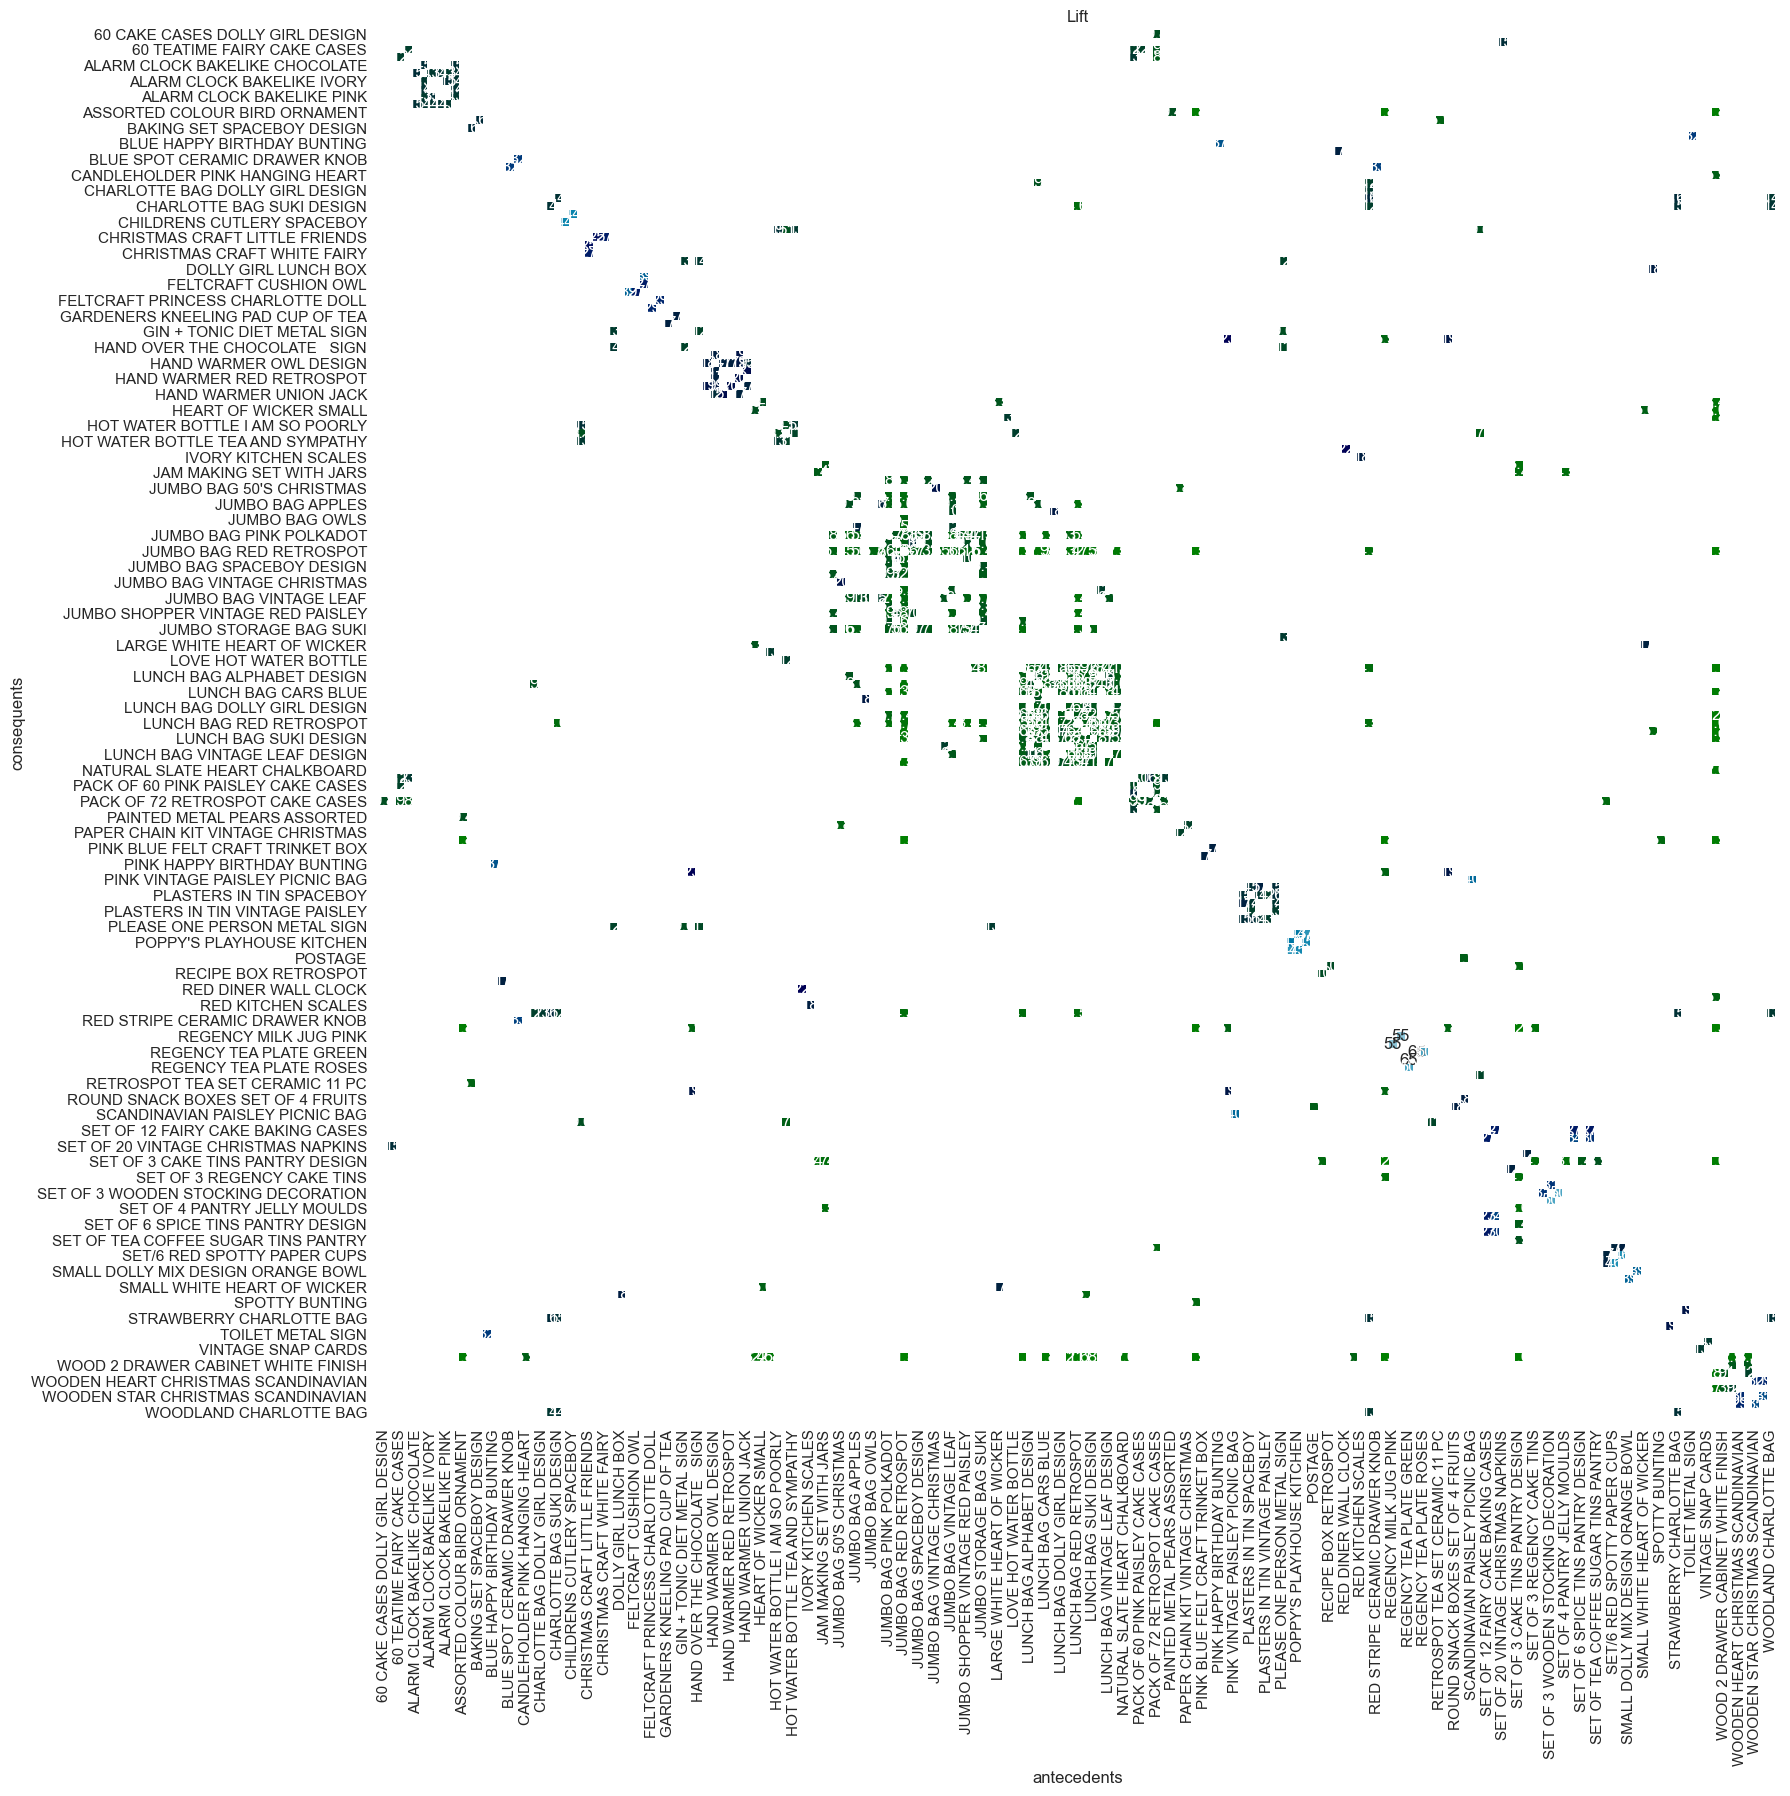

In [26]:
# Transform into matrix.
matrix = rules.pivot(index='consequents', columns='antecedents', values='lift')

# Generate heatmap.
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(matrix, annot=True, cbar=False, cmap='ocean')
plt.title('Lift')
plt.show()

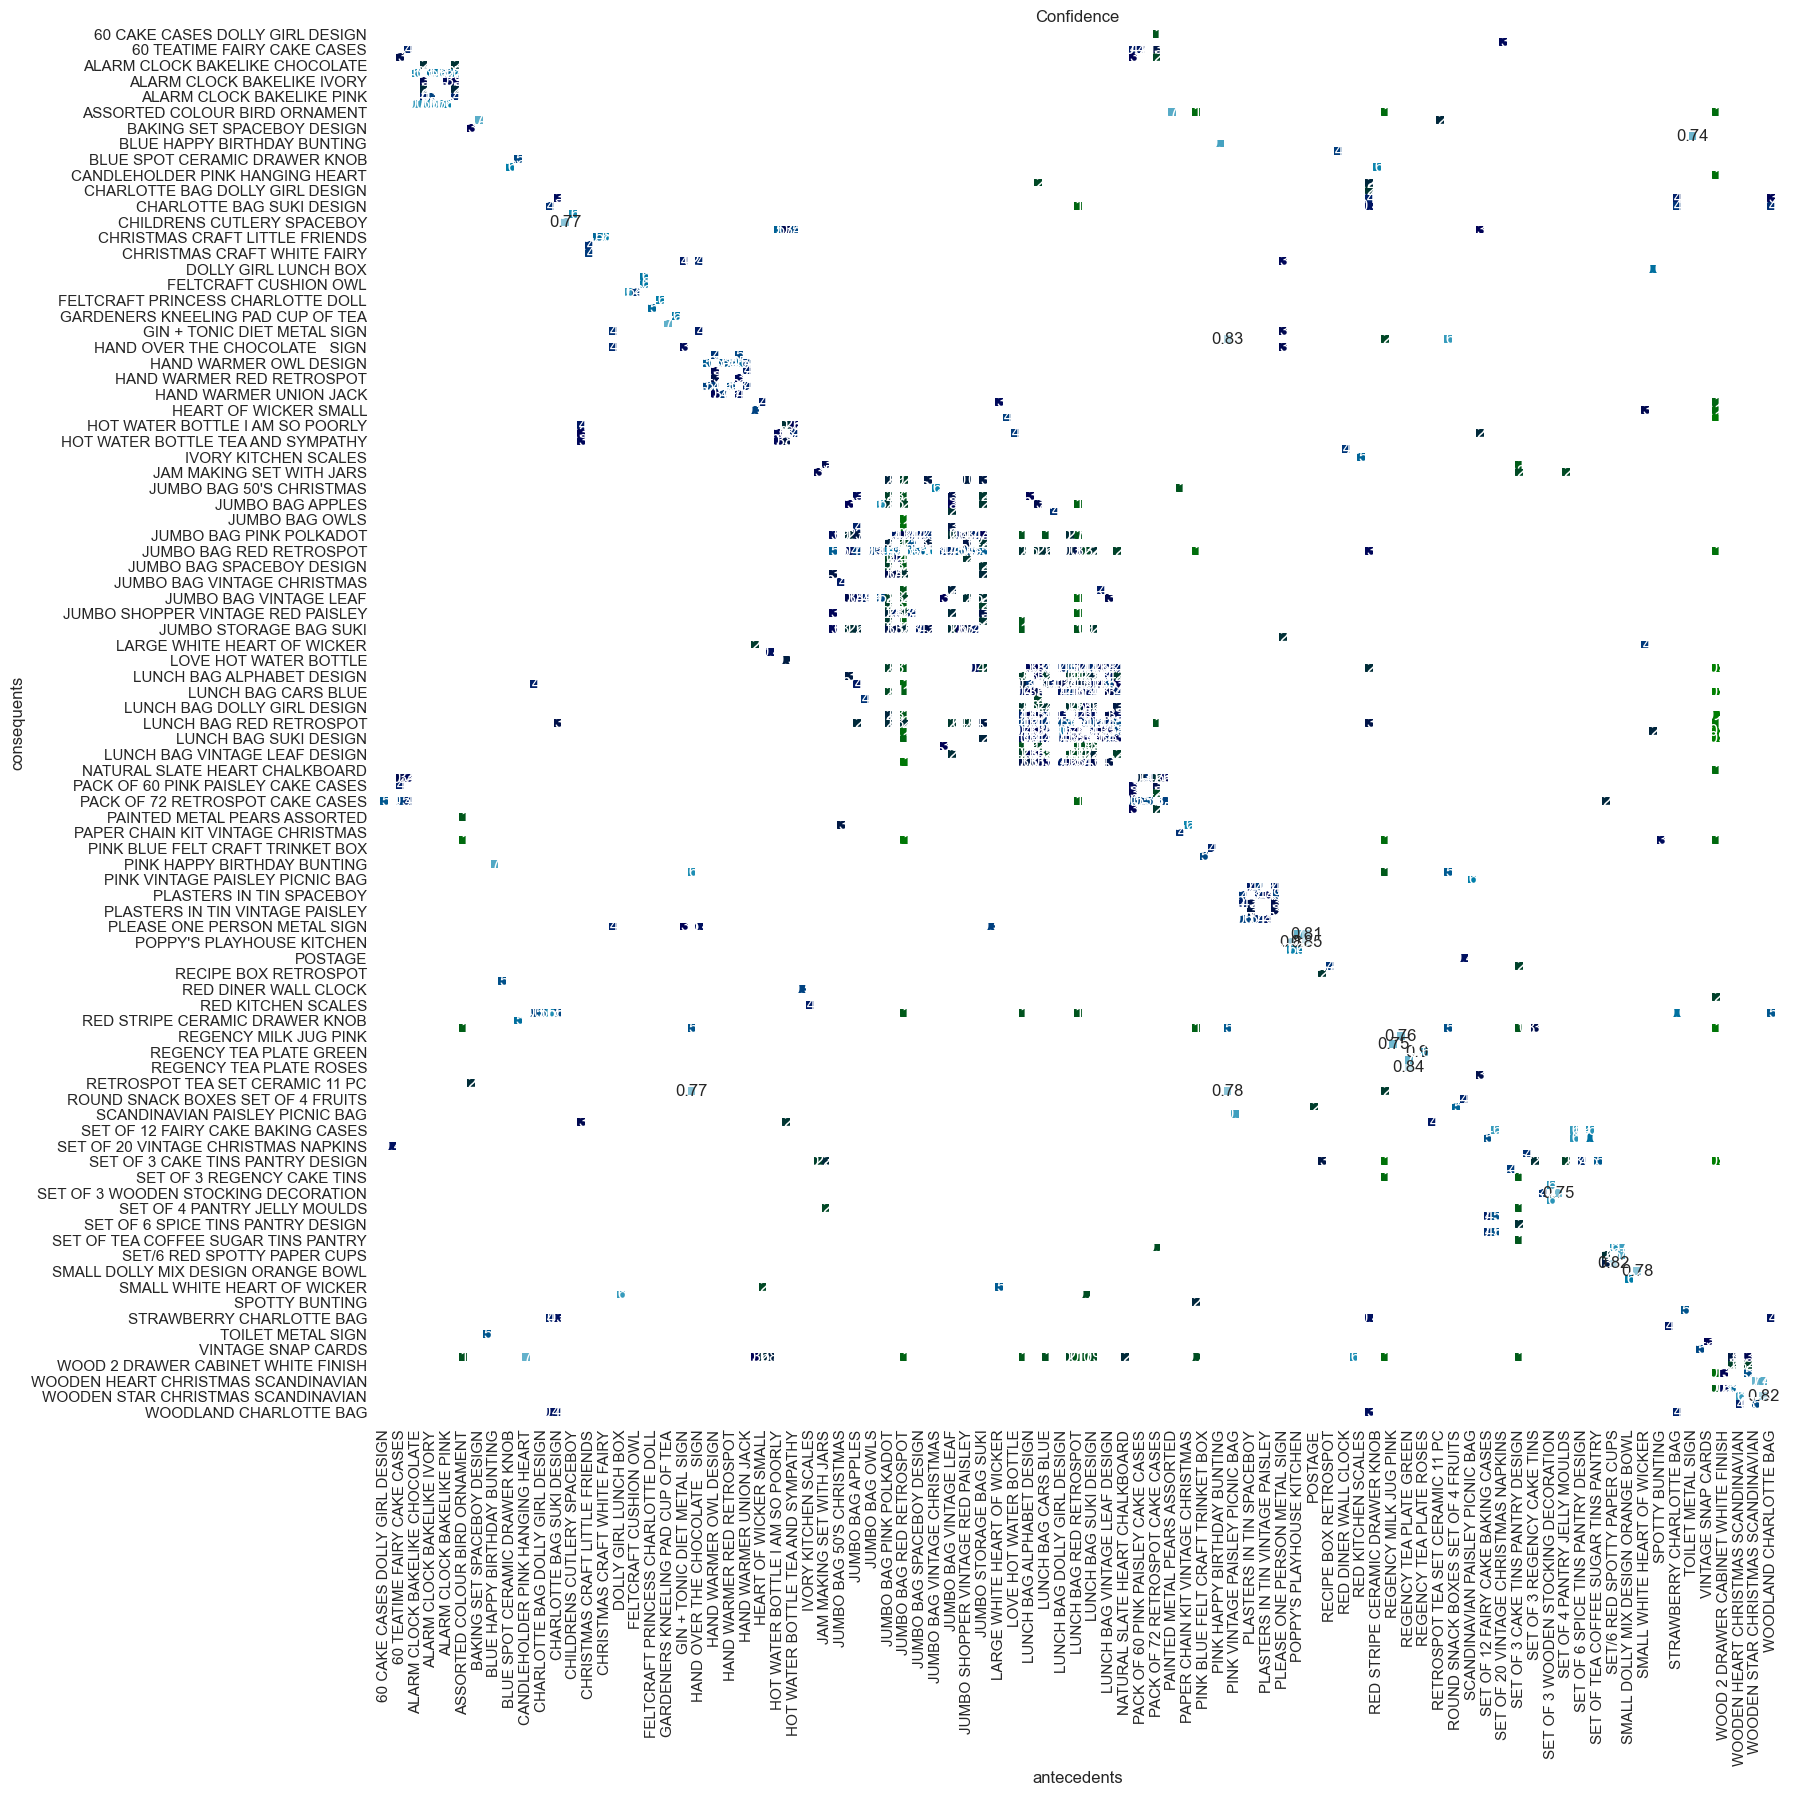

In [27]:
# Transform into matrix.
matrix = rules.pivot(index='consequents', columns='antecedents', values='confidence')

# Generate heatmap.
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(matrix, annot=True, cbar=False, cmap='ocean')
plt.title('Confidence')
plt.show()